In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
#
drop_ls = [
    "expected_time",
    "flip_time",
    "stim_pos",
    "user_pos",
    "lambda_val",
    "change_rate_x",
]

In [32]:
# Directory where files are stored
raw_data = pd.read_csv('hopkins_export/sub-M10901084_cpt.csv')  # Adjust this path as needed
#ZS_data = pd.read_csv('zscore_subjects\zscore_sub-M10901084_cpt.csv')
ZS_data = pd.read_csv('hopkins_export/sub-M10901084_cpt.csv')
MM_data = pd.read_csv('minmax_subjects\minmax_sub-M10901084_cpt.csv')
RS_data = pd.read_csv("robust_subjects\Robust_Scaling_sub-M10901084_cpt.csv")

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\R'
C:\Users\ishad\AppData\Local\Temp\ipykernel_14460\3204396681.py:5: SyntaxWarning: invalid escape sequence '\m'
  MM_data = pd.read_csv('minmax_subjects\minmax_sub-M10901084_cpt.csv')
C:\Users\ishad\AppData\Local\Temp\ipykernel_14460\3204396681.py:6: SyntaxWarning: invalid escape sequence '\R'
  RS_data = pd.read_csv("robust_subjects\Robust_Scaling_sub-M10901084_cpt.csv")


In [33]:
# Set parameters for analysis
np.random.seed(23)
Lambda = 0.01  # Regularization strengths for Ridge
kf_splits = 5

sample_sizes = np.geomspace(1000, len(raw_data), num=3, dtype=int)

raw_posdif_r2_scores = []
raw_pos_r2_scores = []
raw_speed_r2_scores = []
ZS_posdif_r2_scores = []
ZS_pos_r2_scores = []
ZS_speed_r2_scores = []
MM_posdif_r2_scores = []
MM_pos_r2_scores = []
MM_speed_r2_scores = []
RS_posdif_r2_scores = []
RS_pos_r2_scores = []
RS_speed_r2_scores = []

In [34]:
ridge_model = Ridge(alpha=Lambda)
kf = KFold(n_splits=kf_splits, shuffle=True, random_state=23)

# Iterate over each sample size
for sample_size in sample_sizes:
    np.random.seed(23)
    sample_indices = np.random.choice(len(raw_data), sample_size, replace=False)

    x_raw = raw_data.drop(columns=drop_ls).iloc[sample_indices].values
    # x_ZS = ZS_data.drop(columns=drop_ls).iloc[sample_indices].values
    x_ZS = (x_raw - x_raw.mean(axis = 0)) / x_raw.std(axis = 0)
    x_MM = MM_data.drop(columns=drop_ls).iloc[sample_indices].values
    x_RS = RS_data.drop(columns=drop_ls).iloc[sample_indices].values

    y_pos_dif = (raw_data["user_pos"].iloc[sample_indices] - raw_data["stim_pos"].iloc[sample_indices]).values
    y_pos = raw_data["stim_pos"].iloc[sample_indices].values
    y_speed = raw_data["change_rate_x"].iloc[sample_indices].values

    # Function to calculate mean R^2 score for each dataset and target
    def get_kfold_scores(X, y):
        return np.mean([ridge_model.fit(X[train_idx], y[train_idx]).score(X[test_idx], y[test_idx])
                        for train_idx, test_idx in kf.split(X)])

    # Calculate and store mean R² scores for each dataset and target
    raw_posdif_r2_scores.append(get_kfold_scores(x_raw, y_pos_dif))
    raw_pos_r2_scores.append(get_kfold_scores(x_raw, y_pos))
    raw_speed_r2_scores.append(get_kfold_scores(x_raw, y_speed))

    ZS_posdif_r2_scores.append(get_kfold_scores(x_ZS, y_pos_dif))
    ZS_pos_r2_scores.append(get_kfold_scores(x_ZS, y_pos))
    ZS_speed_r2_scores.append(get_kfold_scores(x_ZS, y_speed))

    MM_posdif_r2_scores.append(get_kfold_scores(x_MM, y_pos_dif))
    MM_pos_r2_scores.append(get_kfold_scores(x_MM, y_pos))
    MM_speed_r2_scores.append(get_kfold_scores(x_MM, y_speed))

    RS_posdif_r2_scores.append(get_kfold_scores(x_RS, y_pos_dif))
    RS_pos_r2_scores.append(get_kfold_scores(x_RS, y_pos))
    RS_speed_r2_scores.append(get_kfold_scores(x_RS, y_speed))

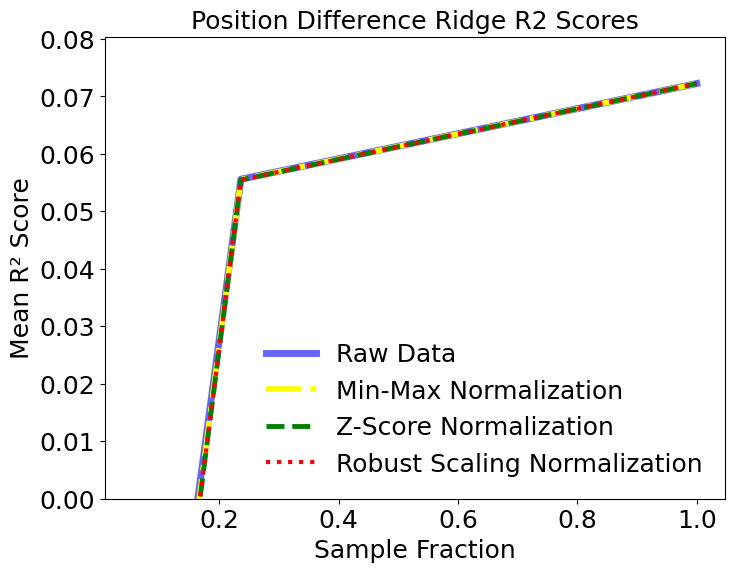

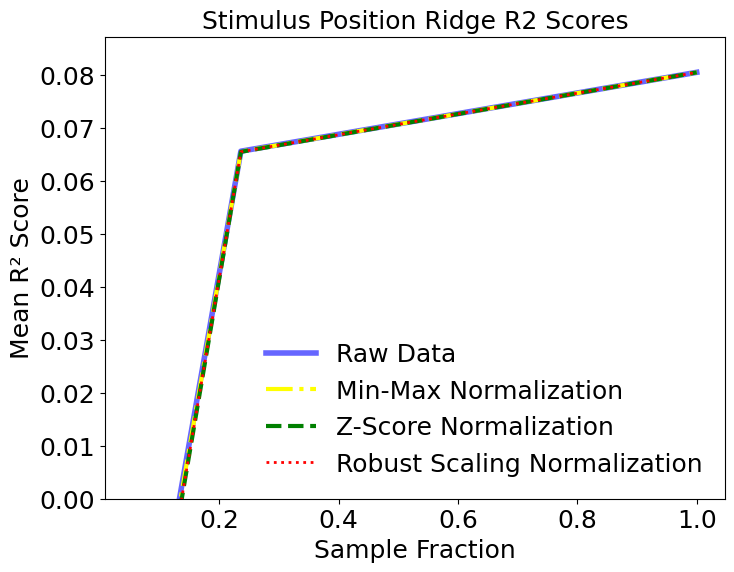

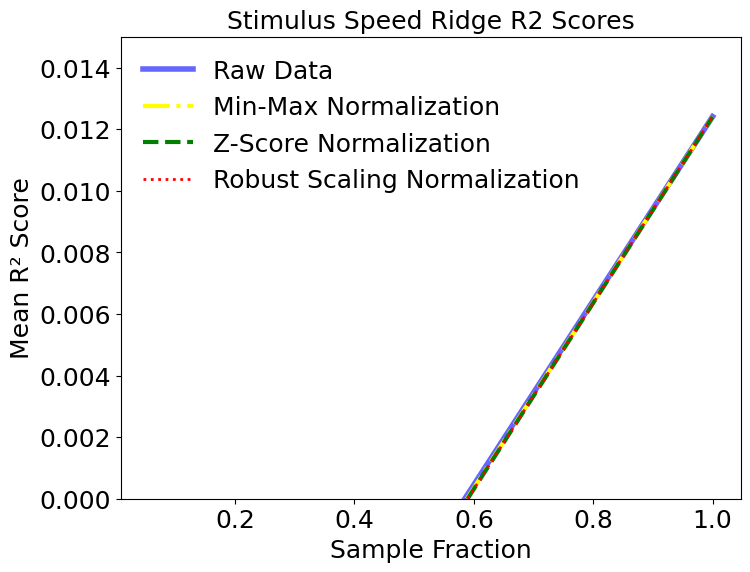

In [46]:
# Calculate sample fractions
sample_fractions = np.array([size / len(raw_data) for size in sample_sizes])

# Organize R² scores for each target variable and each data type
position_difference_scores = np.array([raw_posdif_r2_scores, MM_posdif_r2_scores, ZS_posdif_r2_scores, RS_posdif_r2_scores])
position_scores = np.array([raw_pos_r2_scores, MM_pos_r2_scores, ZS_pos_r2_scores, RS_pos_r2_scores])
speed_scores = np.array([raw_speed_r2_scores, MM_speed_r2_scores, ZS_speed_r2_scores, RS_speed_r2_scores])

# Labels for the data types
x_data_labels = ['Raw Data',  'Min-Max Normalization', 'Z-Score Normalization', 'Robust Scaling Normalization']

# Define custom colors and linestyles for each line (adjust as desired)
colors = ['blue', 'yellow', 'green', 'red']  # Example colors
linestyles = ['-', '-.', '--', ':']  # Example linestyles

# Plot Position Difference
plt.figure(figsize=(8, 6))
plt.plot(sample_fractions, position_difference_scores[0], color=colors[0], linestyle=linestyles[0], linewidth = 5, label=x_data_labels[0], alpha = 0.6)
plt.plot(sample_fractions, position_difference_scores[1], color=colors[1], linestyle=linestyles[1], linewidth = 4, label=x_data_labels[1])
plt.plot(sample_fractions, position_difference_scores[2], color=colors[2], linestyle=linestyles[2], linewidth = 3.5, label=x_data_labels[2])
plt.plot(sample_fractions, position_difference_scores[3], color=colors[3], linestyle=linestyles[3], linewidth = 3, label=x_data_labels[3])
plt.xlabel('Sample Fraction', fontsize = 18)
plt.ylabel('Mean R² Score', fontsize = 18)
plt.title('Position Difference Ridge R2 Scores', fontsize = 18)
plt.legend(frameon=False, loc = 4, fontsize = 18)
plt.ylim(0,None)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()

# Plot Position
plt.figure(figsize=(8, 6))
plt.plot(sample_fractions, position_scores[0], color=colors[0], linestyle=linestyles[0], linewidth = 4, label=x_data_labels[0], alpha = 0.6)
plt.plot(sample_fractions, position_scores[1], color=colors[1], linestyle=linestyles[1], linewidth = 3, label=x_data_labels[1])
plt.plot(sample_fractions, position_scores[2], color=colors[2], linestyle=linestyles[2], linewidth = 3, label=x_data_labels[2])
plt.plot(sample_fractions, position_scores[3], color=colors[3], linestyle=linestyles[3], linewidth = 2, label=x_data_labels[3])
plt.xlabel('Sample Fraction', fontsize = 18)
plt.ylabel('Mean R² Score', fontsize = 18)
plt.title('Stimulus Position Ridge R2 Scores', fontsize = 18)
plt.legend(frameon=False, loc = 4, fontsize = 18)
plt.ylim(0,None)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()

# Plot Speed
plt.figure(figsize=(8, 6))
plt.plot(sample_fractions, speed_scores[0], color=colors[0], linestyle=linestyles[0], linewidth = 4, label=x_data_labels[0], alpha = 0.6)
plt.plot(sample_fractions, speed_scores[1], color=colors[1], linestyle=linestyles[1], linewidth = 3, label=x_data_labels[1])
plt.plot(sample_fractions, speed_scores[2], color=colors[2], linestyle=linestyles[2], linewidth = 3, label=x_data_labels[2])
plt.plot(sample_fractions, speed_scores[3], color=colors[3], linestyle=linestyles[3], linewidth = 2, label=x_data_labels[3])
plt.xlabel('Sample Fraction', fontsize = 18)
plt.ylabel('Mean R² Score', fontsize = 18)
plt.title('Stimulus Speed Ridge R2 Scores', fontsize = 18)
plt.legend(frameon=False, fontsize = 18)
plt.ylim(0,None)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
